# Generate series of Spectra from Cadence


- author : Sylvie Dagoret-Campagne
- date   : Jul 18th 2018


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import numpy as np
import sys
import os
import pandas as pd
import glob
from matplotlib.backends.backend_pdf import PdfPages 

In [3]:
from astropy.io import fits

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
from lsst.sims.photUtils import SignalToNoise
from lsst.sims.photUtils import PhotometricParameters
from lsst.sims.photUtils import Bandpass,Sed

In [6]:
from MyTelescope import *
from MyThroughputs import *

In [7]:
tel=Telescope(airmass=1.5)

**** Throughputs.__init__****
System loaded from /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/throughputs/2017.01.31-6-g29ce4f5/baseline/
**** Telescope.__init__******


# Definition of SED files

- Picles in units erg/cm2/s/nm

In [8]:
sed_file="regenerated_sedgrid_pickle_uvk.fits"

In [9]:
sed_hdu = fits.open(sed_file)

In [10]:
theheader=sed_hdu[0].header
theheader

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8515                                                  
NAXIS2  =                12963                                                  
NBSED   =                12962                                                  
NBWLBIN =                 8510                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11510.0                                                  
WLBINWDT=                  1.0                                                  
SEDUNIT = 'FLAM    '                                                            
SEDMODEL= 'pickle_uvk'                                                          
IDX_NUM =                   

In [11]:
sidx_num=theheader['IDX_NUM']
sidx_val=theheader['IDX_VAL']
sidx_sed=theheader['IDX_SED']
sidx_data=theheader['IDX_DATA']
sidx_spec=theheader['IDX_SPEC']

In [12]:
sed_data=sed_hdu[0].data

# Definition of Cadence file summary

In [13]:
cadence_atm_program_file='cadence_field1000.csv'

In [14]:
df=pd.read_csv(cadence_atm_program_file,index_col=False)

In [15]:
df.head()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.25,21.732956,24.241311,0.704040,0.0
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.25,21.791891,24.160844,0.859973,0.0
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.00,19.037479,23.215870,0.504610,0.0
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.00,19.223263,23.364350,0.462390,0.0
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.00,17.300000,21.767917,0.633086,0.0


In [16]:
NBVISITS=len(df)

In [17]:
print("Nb visits = {}".format(NBVISITS))

Nb visits = 912


# Definition of atmospheric file

In [18]:
atmospheric_file='cadence_field1000_atm_sim_{}.fits'.format(1)

In [19]:
hdu = fits.open(atmospheric_file)

In [20]:
hdu.info()

Filename: cadence_field1000_atm_sim_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (961, 913)   float64   


In [21]:
theheader=hdu[0].header
theheader

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  961                                                  
NAXIS2  =                  913                                                  
NBATMSIM=                  912                                                  
ID_NUM  =                    0                                                  
ID_NIGHT=                    1                                                  
ID_DATE =                    2                                                  
ID_EXMJD=                    3                                                  
ID_AM   =                    4                                                  
ID_FILT =                    5                                                  
ID_VAOD =                   

In [22]:
idx_num=theheader['ID_NUM']
idx_night=theheader['ID_NIGHT']
idx_date=theheader['ID_DATE']
idx_date=theheader['ID_EXMJD']
idx_am=theheader['ID_AM']
idx_filt=theheader['ID_FILT']
idx_vaod=theheader['ID_VAOD']
idx_pwv=theheader['ID_PWV']
idx_o3=theheader['ID_O3']
idx_cld=theheader['ID_CLD']
idx_res=theheader['ID_RES']

In [23]:
atmdata=hdu[0].data

In [24]:
NBATM=atmdata.shape[0]-1

# Check Atm Simulations

In [25]:
am=atmdata[1:,idx_am] # airmass distribution
filt=atmdata[1:,idx_filt] # filter distribution
vaod=atmdata[1:,idx_vaod] # aerosols distribution
pwv=atmdata[1:,idx_pwv] # pwv distribution
o3=atmdata[1:,idx_o3] # o3 distribution
cld=atmdata[1:,idx_cld] # cld distribution

In [26]:
min_od=cld.min()

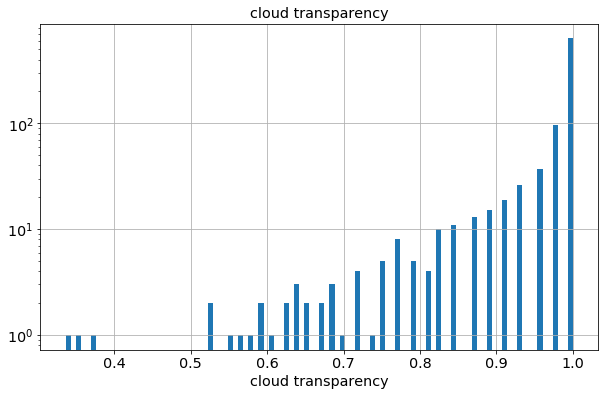

In [27]:
plt.hist(np.exp(-(cld-min_od)/100.),bins=100);
plt.yscale('log')
plt.xlabel("cloud transparency")
plt.title("cloud transparency")
plt.grid(True)

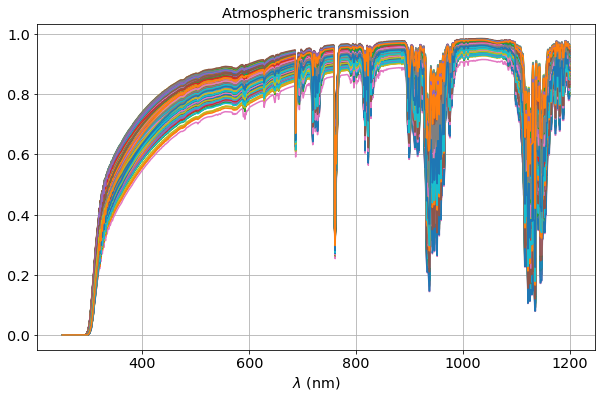

In [28]:
for count in np.arange(NBATM):
    plt.plot(atmdata[0,idx_res:],atmdata[count+1,idx_res:])
plt.grid(True)
plt.title("Atmospheric transmission")
plt.xlabel("$\lambda$ (nm)")

In [29]:
tel=Telescope()

**** Throughputs.__init__****
System loaded from /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/throughputs/2017.01.31-6-g29ce4f5/baseline/
**** Telescope.__init__******


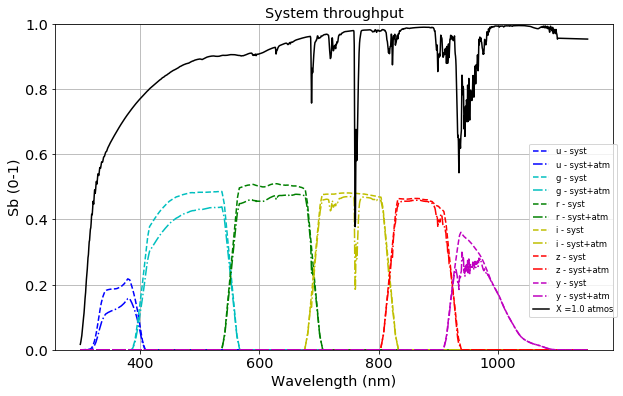

In [30]:
tel.Plot_Throughputs()

#  Select a Pickle

$S_\lambda(\lambda)$ in erg/cm2/s/nm

In [31]:
idx=2113
picklesname='Pickles {}'.format(idx)

In [32]:
picklesnum="{:06d}".format(idx)

In [33]:
print(picklesnum)

002113


In [34]:
output_file="auxtel_spectrasim_pickles_{}.txt".format(picklesnum)

In [35]:
output_file

'auxtel_spectrasim_pickles_002113.txt'

In [36]:
wl_sed=sed_data[0,sidx_spec:]/10.
flux_sed=sed_data[idx+1,sidx_spec:]*10.

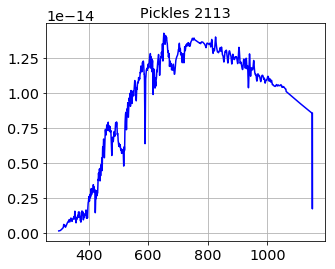

In [37]:
plt.figure(figsize=(5,4))
plt.plot(wl_sed,flux_sed,'b-')
plt.grid(True)
plt.title(picklesname)

In [38]:
tel.Set_SED(wavel=wl_sed,newsed=flux_sed,name=picklesname)

# MAIN LOOP ON Auxtel VISITS like cadence

In [ ]:
all_mag_adu=[]
all_mag_err=[]
all_filt_num=[]
all_am=[]
for visit in np.arange(NBVISITS):
    idx=visit+1
    
    # from atmospheric simulation
    am=atmdata[idx,idx_am] 
    wl=atmdata[0,idx_res:]
    tr=atmdata[idx,idx_res:]
    cld=atmdata[idx,idx_cld] # cld distribution
    
    
    #decode cadence
    data_series=df.iloc[visit]
    #print(data_series)
    filter_band=data_series["filter"]
    filternum=tel.filternum[filter_band]
    skybrightness=data_series["filtskybrightness"]
    transparency=1.-data_series["transparency"]
    FWHMgeom=data_series["finseeing"]
    
    newtransparency=np.exp(-(cld-min_od)/100.)
    tr_res=newtransparency*tr
    
    #print("filter={}  skybrightness={}  FWHMGeom= {}   transparency= {}".format(filter_band,skybrightness,FWHMgeom,transparency))
    
    tel.Set_Atmosphere(am,wl,tr_res)
    #tel.Plot_Throughputs()
    
    mag_adu=tel.CalcMyADUMagnitude_filter(filter_band)
    mag_err=tel.CalcMyABMagnitudesError_filter(filter_band,skybrightness,FWHMgeom)
    
    #randomize the magnitudes to take into account detector effect
    fl_adu=np.power(10,-0.4*mag_adu)
    sigma_fl=2.3/2.5*mag_err*fl_adu
        
    fl_rand = np.random.normal(fl_adu, sigma_fl,1)[0]
        
    while fl_rand<0:
        fl_rand = np.random.normal(fl_adu, sigma_fl,1)[0]
            
    mag_rand=-2.5*np.log10(fl_rand)

    #print("filt={} : ADU = {}  +/- {}".format(filter_band,mag_adu,mag_err))
    
    #all_mag_adu.append(mag_adu)
    all_mag_adu.append(mag_rand)
    all_mag_err.append(mag_err)
    all_filt_num.append(filternum)
    all_am.append(am)
    
all_mag_adu=np.array(all_mag_adu)
all_mag_err=np.array(all_mag_err)
all_filt_num=np.array(all_filt_num)
all_am=np.array(all_am)

In [ ]:
plt.scatter(all_mag_adu,all_mag_err)
plt.grid()

In [ ]:
#np.savetxt(output_file,np.c_[all_am,all_filt_num,all_mag_adu,all_mag_err],header="airmass \t filter(1..6) \t instrum-mag (ADU) \t error-mag")